Transfer Learning with Data Augmentation

In [ ]:
# 

In [2]:
# from zipfile import ZipFile
# zipfile_ref = ZipFile('./dogs-vs-cats.zip','r')
# zipfile_ref.extractall('./data')
# zipfile_ref.close()

In [3]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-09 14:49:46.654223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
%ls

data/  transfer-learning-data-aug.ipynb  transfer-learning.ipynb


In [5]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen  = ImageDataGenerator(
    rescale=1./255
)

train_ds = train_datagen.flow_from_directory(
    directory = './data/train',
    batch_size = batch_size,
    class_mode = 'binary',
    target_size = (224, 224)
)

validation_ds = test_datagen.flow_from_directory(
    directory = './data/test',
    batch_size = batch_size,
    class_mode = 'binary',
    target_size = (224,224)
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.applications.vgg16 import VGG16

In [7]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3)
)

2024-10-09 14:49:49.877005: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-09 14:49:49.883902: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-09 14:49:49.884408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,062,209 (156.64 MB)

 Trainable params: 41,062,209 (156.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
conv_base.trainable = False

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


/home/nikhilds/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728465594.504296   52493 service.cc:145] XLA service 0x7511a4006590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728465594.504325   52493 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-10-09 14:49:54.546347: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-09 14:49:54.832182: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
202

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.8228 - loss: 0.5011

2024-10-09 14:53:18.479001: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-09 14:53:19.842209: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-09 14:53:21.108156: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 307ms/step - accuracy: 0.8229 - loss: 0.5008 - val_accuracy: 0.9346 - val_loss: 0.1580
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 302ms/step - accuracy: 0.9187 - loss: 0.1932 - val_accuracy: 0.9338 - val_loss: 0.1601
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 299ms/step - accuracy: 0.9276 - loss: 0.1740 - val_accuracy: 0.9376 - val_loss: 0.1448
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 298ms/step - accuracy: 0.9318 - loss: 0.1607 - val_accuracy: 0.9422 - val_loss: 0.1472
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 304ms/step - accuracy: 0.9396 - loss: 0.1522 - val_accuracy: 0.9382 - val_loss: 0.1505
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 299ms/step - accuracy: 0.9447 - loss: 0.1323 - val_accuracy: 0.9352 - val_loss: 0.1592
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 299ms/step - accuracy: 0.9483 - loss: 0.1322 - val_accuracy: 0.9422 - val_loss: 0.1380
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 299ms/step - accuracy: 0.9501 - loss: 0.12

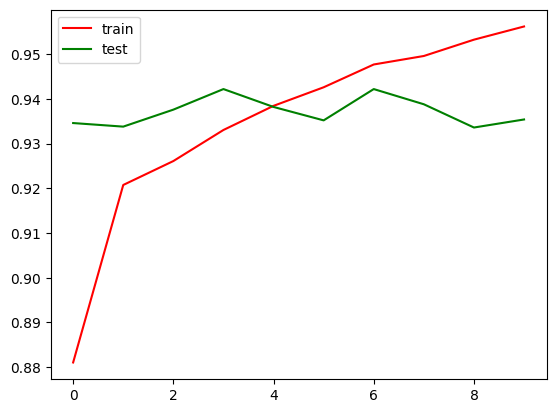

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='test')
plt.legend()

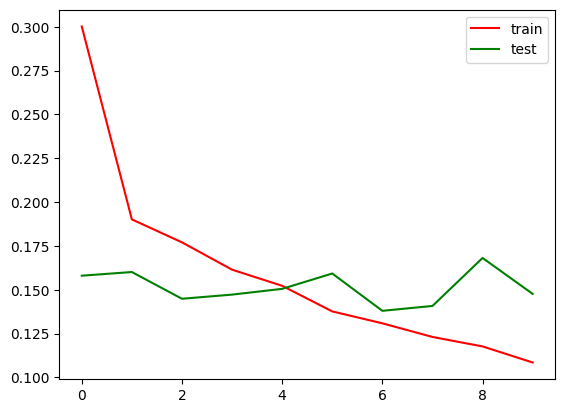

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='test')
plt.legend()

In [17]:
from keras.preprocessing import image

In [18]:
img_path = image.load_img('./dog.jpeg',target_size=(224,224))

In [19]:
img = image.img_to_array(img_path)

In [20]:
import numpy as np
img = np.expand_dims(img,axis=0)

In [21]:
predictions = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [22]:
'dog' if predictions[0][0] == 1 else 'cat'

'dog'